# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) 

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
date = []
city_name = []

print("Beginning Data Retrieval")
print("-----------------------------")
chunk_size = 50
set_index = 0

# Append information   
# Building URL
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="
# iterate over city list in chuck size of 50
for start in range(0,len(cities),chunk_size): 
    end = start + chunk_size
    set_index += 1
    for city in cities[start:end]:
        response = requests.get(query_url + city).json()
        
        try:
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append (response["coord"]["lon"])
            max_temp.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            clouds.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])    
            print(f"Processing Record {cities[start:end].index(city)+1} of Set {set_index} | {city}")
        except:
            print("City not found. Skipping...")
            pass

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | buraydah
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | albanel
Processing Record 9 of Set 1 | san pedro de macoris
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | lattes
Processing Record 15 of Set 1 | oeiras do para
City not found. Skipping...
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | pacific grove
Processing Record 21 of Set 1 | dingle
Processing Record 22 of Set 1 | avarua
City not found. Skipping...
City not found. Skipp

Processing Record 5 of Set 5 | biltine
Processing Record 6 of Set 5 | sungairaya
Processing Record 7 of Set 5 | obera
Processing Record 8 of Set 5 | senador jose porfirio
Processing Record 9 of Set 5 | nadym
Processing Record 10 of Set 5 | majene
Processing Record 11 of Set 5 | thompson
Processing Record 12 of Set 5 | karaton
Processing Record 13 of Set 5 | severo-kurilsk
Processing Record 14 of Set 5 | blagoyevo
Processing Record 15 of Set 5 | pizarro
Processing Record 16 of Set 5 | acajutla
Processing Record 17 of Set 5 | dolores
Processing Record 18 of Set 5 | yenagoa
Processing Record 19 of Set 5 | kulunda
City not found. Skipping...
Processing Record 21 of Set 5 | fairview
Processing Record 22 of Set 5 | butaritari
Processing Record 23 of Set 5 | victoria
Processing Record 24 of Set 5 | katsuura
Processing Record 25 of Set 5 | port alfred
Processing Record 26 of Set 5 | esperance
Processing Record 27 of Set 5 | daund
Processing Record 28 of Set 5 | sorland
Processing Record 29 of 

Processing Record 11 of Set 9 | kununurra
Processing Record 12 of Set 9 | sturgeon bay
Processing Record 13 of Set 9 | omboue
Processing Record 14 of Set 9 | malpur
Processing Record 15 of Set 9 | upata
Processing Record 16 of Set 9 | xining
Processing Record 17 of Set 9 | sao joao da barra
Processing Record 18 of Set 9 | lapua
Processing Record 19 of Set 9 | jacareacanga
Processing Record 20 of Set 9 | pirenopolis
Processing Record 21 of Set 9 | kahului
Processing Record 22 of Set 9 | baoding
Processing Record 23 of Set 9 | asyut
Processing Record 24 of Set 9 | artyom
Processing Record 25 of Set 9 | hay river
City not found. Skipping...
Processing Record 27 of Set 9 | harper
Processing Record 28 of Set 9 | tilichiki
Processing Record 29 of Set 9 | santa maria del oro
Processing Record 30 of Set 9 | east london
Processing Record 31 of Set 9 | praia da vitoria
Processing Record 32 of Set 9 | kamaishi
Processing Record 33 of Set 9 | hobyo
Processing Record 34 of Set 9 | panguipulli
Proce

Processing Record 12 of Set 13 | camabatela
Processing Record 13 of Set 13 | sakakah
Processing Record 14 of Set 13 | chapais
Processing Record 15 of Set 13 | rawson
Processing Record 16 of Set 13 | ciudad bolivar
Processing Record 17 of Set 13 | pangai
Processing Record 18 of Set 13 | mount isa
Processing Record 19 of Set 13 | vyazma
Processing Record 20 of Set 13 | vostok
Processing Record 21 of Set 13 | tallahassee
Processing Record 22 of Set 13 | conakry
Processing Record 23 of Set 13 | launceston
Processing Record 24 of Set 13 | zimovniki
Processing Record 25 of Set 13 | te anau
Processing Record 26 of Set 13 | yuanping
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df = pd.DataFrame({"City": city_name, "Lat": lat, "Lng": lng,
                        "Max Temp": max_temp, "Humidity": humidity, "Clouds": clouds,
                       "Wind": wind, "Country": country, "Date": date}) 
# Display the DataFrame
city_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,Hermanus,-34.42,19.23,292.04,63,93,1.34,ZA,1602514974
1,Cidreira,-30.18,-50.21,296.05,58,0,2.49,BR,1602514974
2,Mataura,-46.19,168.86,277.19,95,47,0.23,NZ,1602514974
3,Buraidah,26.33,43.98,303.15,15,0,4.10,SA,1602514975
4,Nikolskoye,59.70,30.79,283.15,87,75,2.00,RU,1602514975


In [7]:
# Export the city data into a .csv
city_df.to_csv("../output_data/city_weather.csv",index=False)

In [8]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,19.298848,13.488045,291.063054,70.064572,50.849913,3.800105,1.602515e+09
std,33.490921,90.102935,10.900780,23.150791,37.963801,2.482420,7.917926e+01
min,-54.800000,-175.200000,260.570000,4.000000,0.000000,0.140000,1.602514e+09
25%,-8.190000,-66.830000,283.150000,57.000000,10.000000,2.000000,1.602515e+09
50%,22.290000,17.890000,293.150000,78.000000,50.000000,3.260000,1.602515e+09
75%,46.830000,91.640000,299.320000,88.000000,90.000000,5.100000,1.602515e+09
max,78.220000,179.320000,313.540000,100.000000,100.000000,18.900000,1.602515e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# There is NO cities with humidity>100
city_df.loc[city_df.Humidity>100] 

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

In [7]:
# Check Datatypes before plotting
city_df.dtypes

City         object
Lat         float64
Lng         float64
Max Temp    float64
Humidity      int64
Clouds        int64
Wind        float64
Country      object
Date          int64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

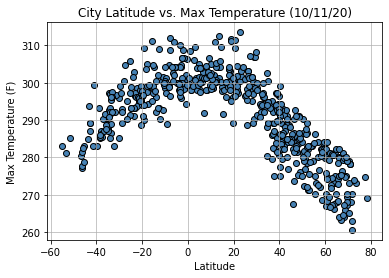

In [11]:
# Scatter plot of Latitude and Temperature
plt.scatter(city_df.Lat,city_df['Max Temp'],facecolor='steelblue',edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/11/20)')
plt.grid(which='major',linewidth=1,alpha=0.7)
plt.savefig('../output_data/lat&temp.png',dpi=200)

## Latitude vs. Humidity Plot

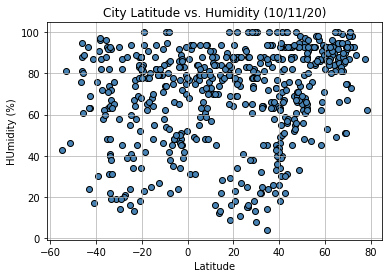

In [12]:
# Scatter plot of Latitude and Humidity
plt.scatter(city_df.Lat,city_df.Humidity,facecolor='steelblue',edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('HUmidity (%)')
plt.title('City Latitude vs. Humidity (10/11/20)')
plt.grid(which='major',linewidth=1,alpha=0.7)
plt.savefig('../output_data/lat&humidity.png',dpi=200)

## Latitude vs. Cloudiness Plot

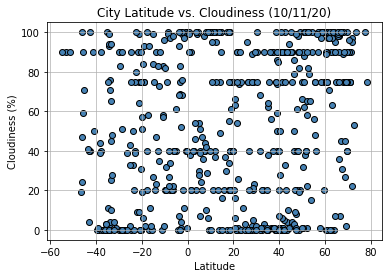

In [13]:
# Scatter plot of Latitude and Cloud
plt.scatter(city_df.Lat,city_df['Clouds'],facecolor='steelblue',edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/11/20)')
plt.grid(which='major',linewidth=1,alpha=0.7)
plt.savefig('../output_data/lat&clouds.png',dpi=200)

## Latitude vs. Wind Speed Plot

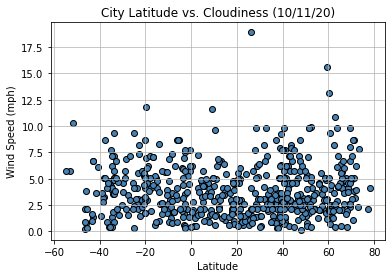

In [14]:
# Scatter plot of Latitude and Wind
plt.scatter(city_df.Lat,city_df['Wind'],facecolor='steelblue',edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Cloudiness (10/11/20)')
plt.grid(which='major',linewidth=1,alpha=0.7)
plt.savefig('../output_data/lat&clouds.png',dpi=200)

## Linear Regression

In [8]:
N_hemisphere = city_df.loc[city_df['Lat'] >= 0]
S_hemisphere = city_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

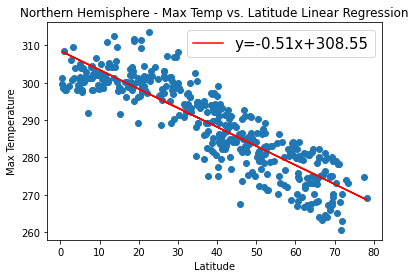

The correlation between tempurature and latitude is about -0.88.


In [12]:
# Perform a linear regression on temp and lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Max Temp'])
# Create line of best fit
fit_values = slope * N_hemisphere['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot 
plt.scatter(N_hemisphere['Lat'],N_hemisphere['Max Temp'])
plt.plot(N_hemisphere['Lat'],fit_values,'r-',label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.legend(fontsize=15)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../output_data/Fig1.png")
plt.show()

print(f"The correlation between tempurature and latitude is about {round(rvalue,2)}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

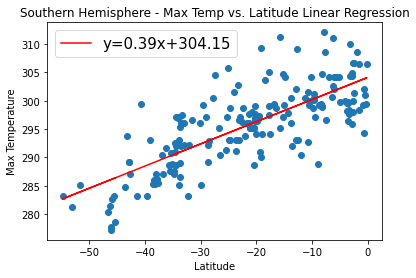

The correlation between tempurature and latitude is about 0.76.


In [14]:
# Perform a linear regression on temp and lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Max Temp'])
# Create line of best fit
fit_values = slope * S_hemisphere['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot 
plt.scatter(S_hemisphere['Lat'],S_hemisphere['Max Temp'])
plt.plot(S_hemisphere['Lat'],fit_values,'r-',label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.legend(fontsize=15)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

plt.savefig("../output_data/Fig2.png",dpi=100)
plt.show()
print(f"The correlation between tempurature and latitude is about {round(rvalue,2)}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

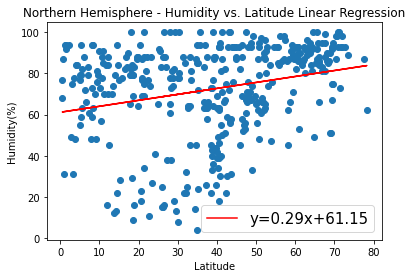

The correlation between Humidity and latitude is about 0.25.


In [15]:
# Perform a linear regression on temp and lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Humidity'])
# Create line of best fit
fit_values = slope * N_hemisphere['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot 
plt.scatter(N_hemisphere['Lat'],N_hemisphere['Humidity'])
plt.plot(N_hemisphere['Lat'],fit_values,'r-',label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.legend(fontsize=15)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

plt.savefig("../output_data/Fig3.png",dpi=100)
plt.show()
print(f"The correlation between Humidity and latitude is about {round(rvalue,2)}.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

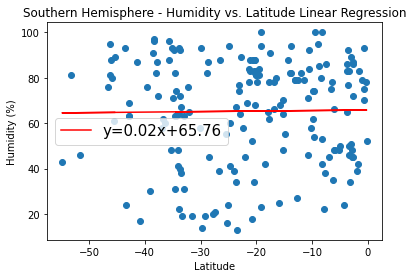

The correlation between Humidity and latitude is about 0.01.


In [16]:
# Perform a linear regression on temp and lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Humidity'])
# Create line of best fit
fit_values = slope * S_hemisphere['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot 
plt.scatter(S_hemisphere['Lat'],S_hemisphere['Humidity'])
plt.plot(S_hemisphere['Lat'],fit_values,'r-',label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.legend(fontsize=15)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')


plt.savefig("../output_data/Fig4.png",dpi=100)
plt.show()
print(f"The correlation between Humidity and latitude is about {round(rvalue,2)}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

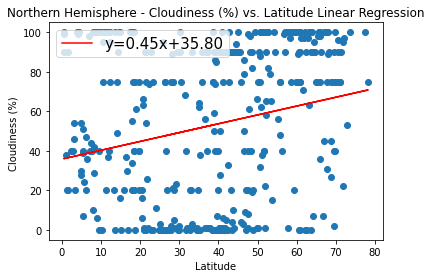

The correlation between Cloudiness (%) and latitude is about 0.23.


In [24]:
# Perform a linear regression on temp and lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Clouds'])
# Create line of best fit
fit_values = slope * N_hemisphere['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot 
plt.scatter(N_hemisphere['Lat'],N_hemisphere['Clouds'])
plt.plot(N_hemisphere['Lat'],fit_values,'r-',label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
plt.legend(fontsize=15)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')


plt.savefig("../output_data/Fig5.png",dpi=100)
plt.show()
print(f"The correlation between Cloudiness (%) and latitude is about {round(rvalue,2)}.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

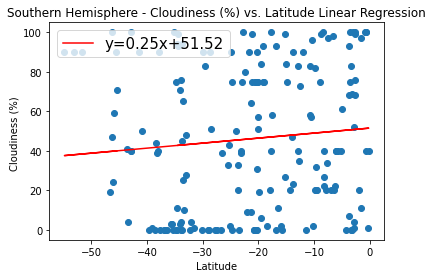

The correlation between Cloudiness (%) and latitude is about 0.1.


In [23]:
# Perform a linear regression on temp and lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Clouds'])
# Create line of best fit
fit_values = slope * S_hemisphere['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot 
plt.scatter(S_hemisphere['Lat'],S_hemisphere['Clouds'])
plt.plot(S_hemisphere['Lat'],fit_values,'r-',label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
plt.legend(fontsize=15)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

plt.savefig("../output_data/Fig6.png",dpi=100)
plt.show()
print(f"The correlation between Cloudiness (%) and latitude is about {round(rvalue,2)}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

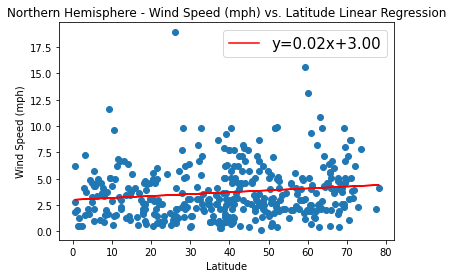

The correlation between Wind Speed (mph) and latitude is about 0.14.


In [21]:
# Perform a linear regression on temp and lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(N_hemisphere['Lat'], N_hemisphere['Wind'])
# Create line of best fit
fit_values = slope * N_hemisphere['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot 
plt.scatter(N_hemisphere['Lat'],N_hemisphere['Wind'])
plt.plot(N_hemisphere['Lat'],fit_values,'r-',label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.legend(fontsize=15)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.savefig("../output_data/Fig7.png",dpi=100)
plt.show()
print(f"The correlation between Wind Speed (mph) and latitude is about {round(rvalue,2)}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

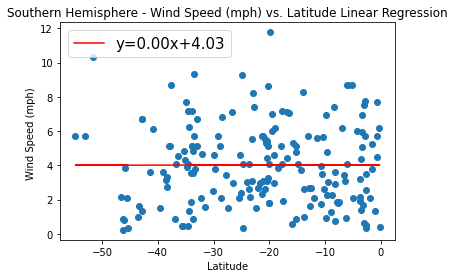

The correlation between Wind Speed (mph) and latitude is about 0.0.


In [22]:
# Perform a linear regression on temp and lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(S_hemisphere['Lat'], S_hemisphere['Wind'])
# Create line of best fit
fit_values = slope * S_hemisphere['Lat'] + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot 
plt.scatter(S_hemisphere['Lat'],S_hemisphere['Wind'])
plt.plot(S_hemisphere['Lat'],fit_values,'r-',label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph) ')
plt.legend(fontsize=15)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

plt.savefig("../output_data/Fig8.png",dpi=100)
plt.show()
print(f"The correlation between Wind Speed (mph) and latitude is about {round(rvalue,2)}.")

### Three major findings:
#### 1. There is a strong correlation between max tempurature and latitude;
#### 2. There tends to be minimal relationship between humidity and latitude in South hemisphere. (r<0.1)
#### 3. There is weak correlation between Cloudiness (%) and latitude. 